# Titanic visualization

- https://www.kaggle.com/michaelabehsera/titanic-solution-a-beginner-s-guide
- https://www.kaggle.com/sashr07/kaggle-titanic-tutorial

## Loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno

plt.style.use('seaborn')

In [2]:
df = pd.read_csv("datasets/titanic_train.csv") # we assume we don't have test set.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Passenger_Id                   891 non-null    int64  
 1   Survived                       891 non-null    int64  
 2   Passenger_Class                891 non-null    object 
 3   Name                           891 non-null    object 
 4   Sex                            891 non-null    object 
 5   Age                            714 non-null    float64
 6   Number_of_Siblings_or_Spouses  891 non-null    int64  
 7   Number_of_Parents_or_Children  891 non-null    int64  
 8   Ticket_Number                  891 non-null    object 
 9   Passenger_Fare                 891 non-null    float64
 10  Cabin                          204 non-null    object 
 11  Port_of_Embarkation            889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 8

In [4]:
df.describe()

,Passenger_Id,Survived,Age,Number_of_Siblings_or_Spouses,Number_of_Parents_or_Children,Passenger_Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.describe(include=['object'])

,Passenger_Class,Name,Sex,Ticket_Number,Cabin,Port_of_Embarkation
count,891,891,891,891,204,889
unique,3,891,2,681,147,3
top,Third,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",male,347082,C23 C25 C27,Southampton
freq,491,1,577,7,4,644


In [6]:
np.random.seed(10)
df.sample(10)

,Passenger_Id,Survived,Passenger_Class,Name,Sex,Age,Number_of_Siblings_or_Spouses,Number_of_Parents_or_Children,Ticket_Number,Passenger_Fare,Cabin,Port_of_Embarkation
590,591,0,Third,"Rintamaki, Mr. Matti",male,35.0,0,0,STON/O 2. 3101273,7.1250,NaN,Southampton
131,132,0,Third,"Coelho, Mr. Domingos Fernandeo",male,20.0,0,0,SOTON/O.Q. 3101307,7.0500,NaN,Southampton
628,629,0,Third,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,NaN,Southampton
195,196,1,First,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,Cherbourg
230,231,1,First,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,Southampton
646,647,0,Third,"Cor, Mr. Liudevit",male,19.0,0,0,349231,7.8958,NaN,Southampton
75,76,0,Third,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,Southampton
586,587,0,Second,"Jarvis, Mr. John Denzil",male,47.0,0,0,237565,15.0000,NaN,Southampton
569,570,1,Third,"Jonsson, Mr. Carl",male,32.0,0,0,350417,7.8542,NaN,Southampton
287,288,0,Third,"Naidenoff, Mr. Penko",male,22.0,0,0,349206,7.8958,NaN,Southampton


In [7]:
df.isnull().sum()

Passenger_Id                       0
Survived                           0
Passenger_Class                    0
Name                               0
Sex                                0
Age                              177
Number_of_Siblings_or_Spouses      0
Number_of_Parents_or_Children      0
Ticket_Number                      0
Passenger_Fare                     0
Cabin                            687
Port_of_Embarkation                2
dtype: int64

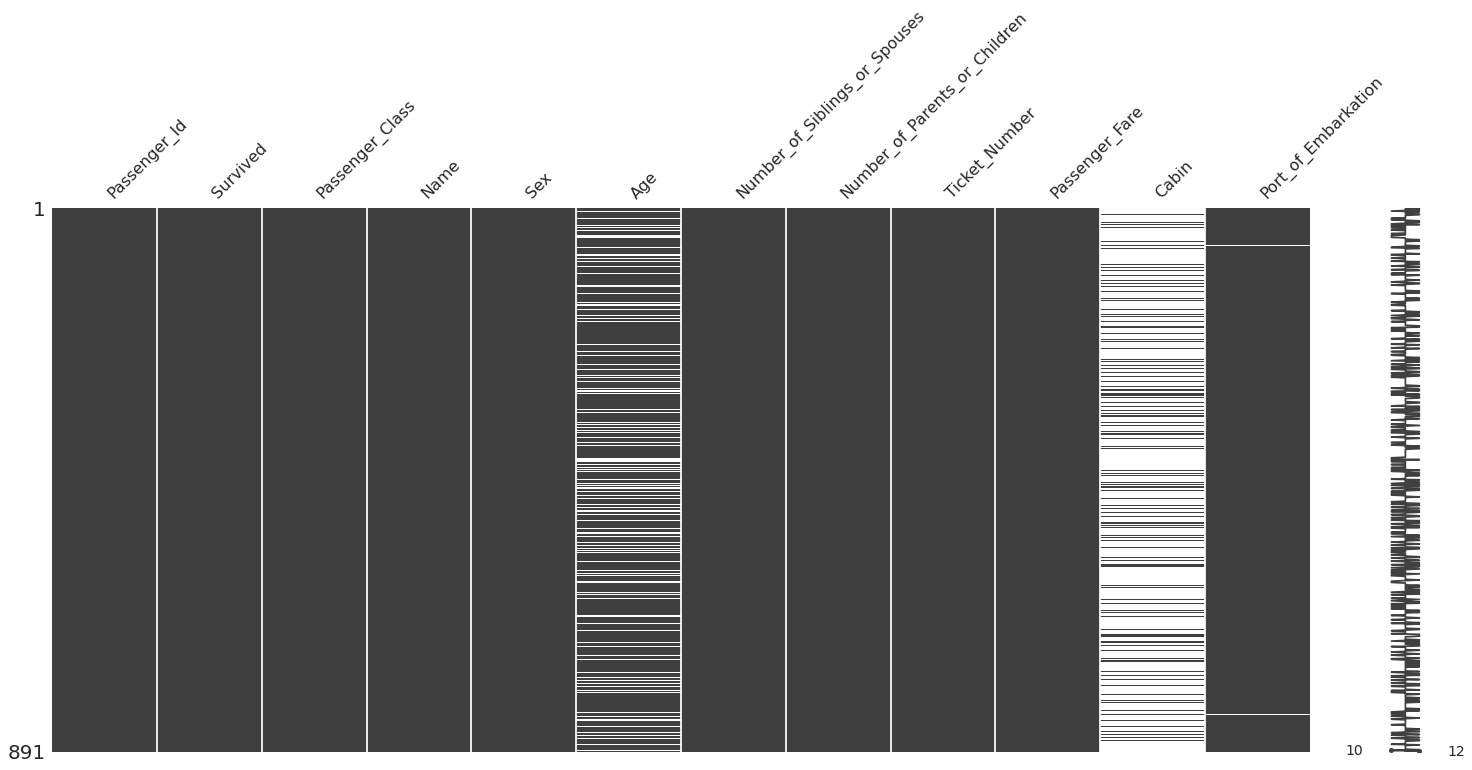

In [8]:
msno.matrix(df)
plt.show()

0    549
1    342
Name: Survived, dtype: int64

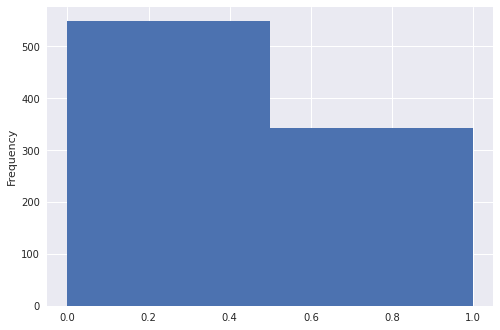

In [9]:
df.Survived.plot.hist(bins=2)
df.Survived.value_counts()

In [10]:
pd.crosstab(df.Survived, df.Passenger_Class, margins=True).style.background_gradient(cmap='Oranges')

Passenger_Class,First,Second,Third,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


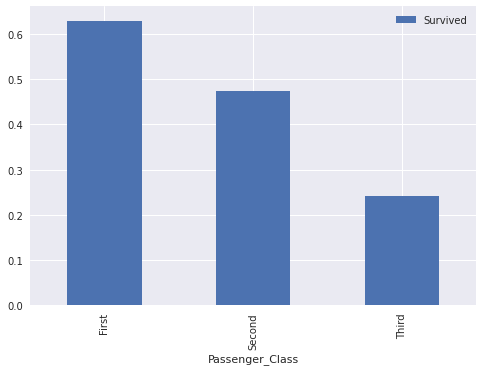

In [11]:
df[['Survived', 'Passenger_Class']].groupby('Passenger_Class').mean().sort_values(by='Survived', ascending=False).plot.bar()
plt.show()

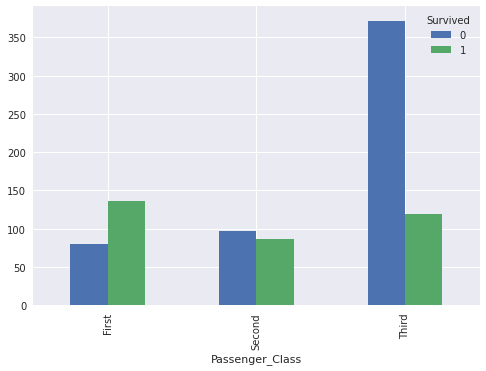

In [12]:
pd.crosstab(df.Passenger_Class, df.Survived).plot.bar()
plt.show()

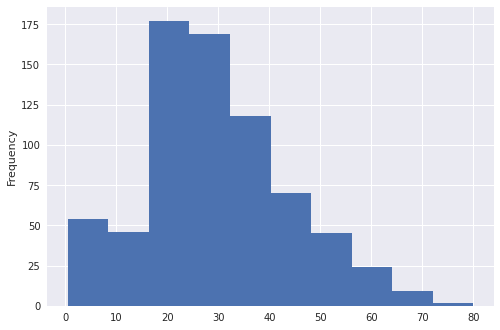

In [13]:
df.Age.plot(kind='hist')
plt.show()

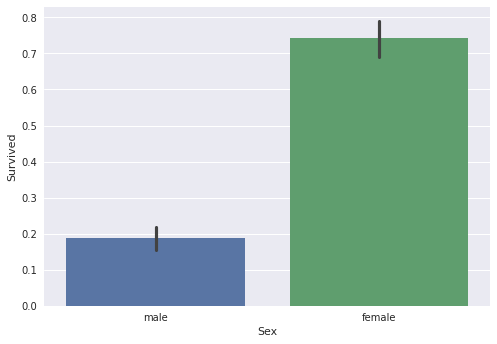

In [14]:
# Sex vs. Survival
# df[['Sex', 'Survived']].groupby("Sex").mean().plot(kind="bar")
sns.barplot(x="Sex", y="Survived", data=df)
plt.show()

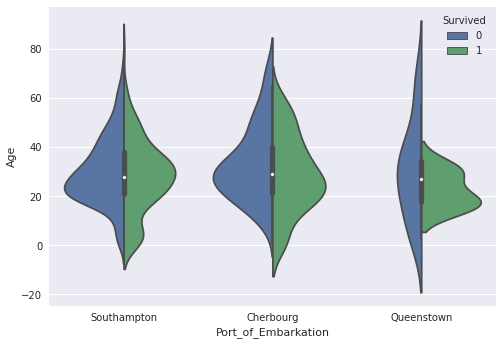

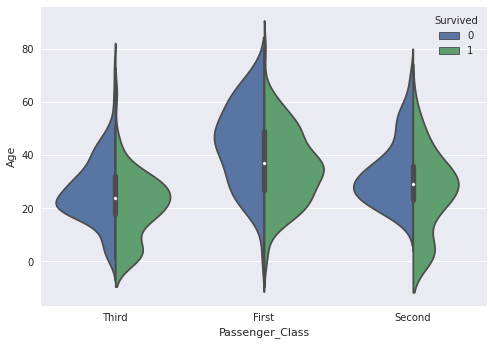

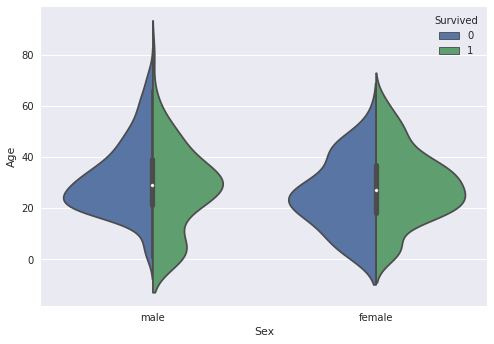

In [15]:
sns.violinplot(x="Port_of_Embarkation", y="Age", hue="Survived", data=df, split=True)
plt.show()
sns.violinplot(x="Passenger_Class", y="Age", hue="Survived", data=df, split=True)
plt.show()
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, split=True)
plt.show()

## Correlation measures

Correlation => Dependence

![relation between correlation and dependence](https://qph.fs.quoracdn.net/main-qimg-5abd437ee5353204779294d3f071e16c)



### Prepare numeric fields with naive transformation

In [16]:
df.head(3)

,Passenger_Id,Survived,Passenger_Class,Name,Sex,Age,Number_of_Siblings_or_Spouses,Number_of_Parents_or_Children,Ticket_Number,Passenger_Fare,Cabin,Port_of_Embarkation
0,1,0,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton


In [17]:
df_numeric = df.drop(['Passenger_Id', 'Name', 'Ticket_Number', 'Port_of_Embarkation', 'Cabin'], axis=1)
df_numeric['Sex'] = df_numeric['Sex'].map({"male": 0, "female": 1})
df_numeric['Passenger_Class'] = df_numeric['Passenger_Class'].map({"First": 0, "Second": 1, "Third": 2})
df_numeric = df_numeric.dropna()

In [18]:
df_numeric.head(3)

,Survived,Passenger_Class,Sex,Age,Number_of_Siblings_or_Spouses,Number_of_Parents_or_Children,Passenger_Fare
0,0,2,0,22.0,1,0,7.2500
1,1,0,1,38.0,1,0,71.2833
2,1,2,1,26.0,0,0,7.9250


### Pearson correlation coefficient

- It’s a measure of the strength and the direction of a linear relationship between two variables.

Let's take a look at the formula! 🙂

![Pearson correlation coefficient examples](https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg)

![Outlier effect example](https://statistics.laerd.com/spss-tutorials/img/pc/pearson-outliers.png)

Assumptions:

- Your 2 variables are continuous. ("Your data is interval or ratio." 🤔)
  - Interval scales: Celious, Farenheit 
  - Ratio scales: Kelvin

- There is a linear relationship between the two variables.
- There should be no significant outliers.
- Your variables should be approximately normally distributed.
  - Check skewness or kurtosis
  - Alternatively you can draw histogram.

(References)
- https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
- https://statistics.laerd.com/spss-tutorials/pearsons-product-moment-correlation-using-spss-statistics.php
- https://www.scribbr.com/statistics/interval-data/
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

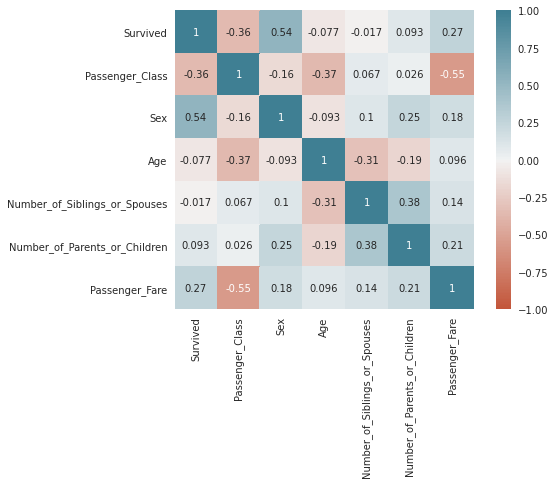

In [19]:
corr = df_numeric.corr()
sns.heatmap(corr, vmax=1, vmin=-1, square=True, annot=True, cmap=sns.diverging_palette(20, 220, n=200))
plt.show()
# corr

### Spearman's rank correlation coefficient

- Non parameteric test. 🤔
- Based on the Pearson correlation coefficient but Spearman's rank correlation coefficient has less assumptions
  - It doesn't rely on the normality.
  - Ordinal fields can be used.

(References)
- https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient
- https://ademos.people.uic.edu/Chapter22.html


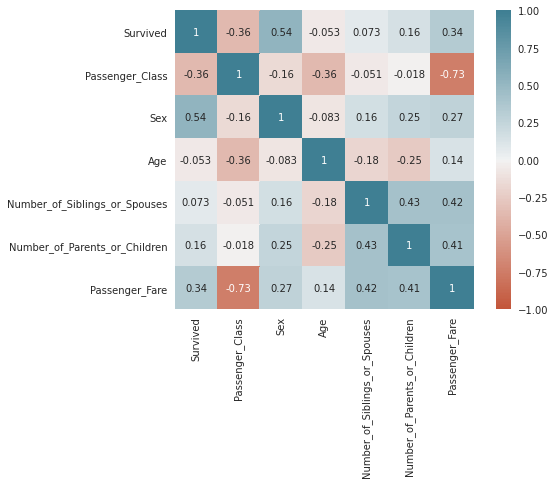

In [20]:
corr = df_numeric.corr(method='spearman')
sns.heatmap(corr, vmax=1, vmin=-1, square=True, annot=True, cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

### Kendall rank correlation coefficient

- Similar to Spearman's rank correlation
- Non parameteric test. 🤔

https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient


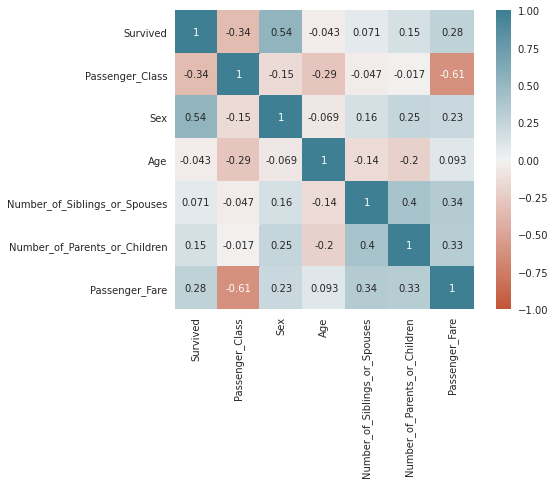

In [21]:
corr = df_numeric.corr(method='kendall')

sns.heatmap(corr, vmax=1, vmin=-1, square=True, annot=True, cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

## Mutual information 

- The mutual information (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other.

![Mutual information examples](https://acp.copernicus.org/articles/18/12699/2018/acp-18-12699-2018-f03-web.png)

- When MI is zero, the quantities are independent.
- Values above 2.0 or so are uncommon

(References)

- https://en.wikipedia.org/wiki/Mutual_information
- https://www.kaggle.com/ryanholbrook/mutual-information

In [22]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

X = df_numeric.copy()
y = X.pop('Survived')
discrete_features = X.dtypes == int

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

Passenger_Fare                   0.150590
Sex                              0.150182
Passenger_Class                  0.097863
Age                              0.030861
Number_of_Siblings_or_Spouses    0.016453
Number_of_Parents_or_Children    0.010136
Name: MI Scores, dtype: float64